<h1><font color='skyblue'>Spark Funds Investment Data Analysis EDA Assignment</font> </h1>

---

## Business Objective

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing’.

#### Business Condition
<li>
invest between 5 to 15 million USD per round of investment</li>
 <li>English-speaking countries
</li>


##### --------Let's Begin ----------#####

### 1. Data Understanding/Exploration

pd.read_csv function works normally but depends on the file we are parsing we need to use proper encoding and engine.
here you will get utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte error which simply says encoding is wrong.
    https://docs.python.org/3/library/codecs.html#standard-encodings
    https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s
    https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
    https://docs.python.org/3.3/howto/unicode.html
    
    Then we will do some basic operation to get look and feel of the data
    - companies.head() -- Top 5 records 
    - companies.info() -- Basic details, column names, not nulls, type
    - rounds2.isnull().sum() -- To check total null values by column 
    - Describe() - to. check mean mode median etc data points

import chardet
with open("projects.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

--check what the character encoding might be good
print(result)
    

In [1]:
import pandas as pd
import numpy as np
companies = pd.read_csv('../input/companydata/companies.csv',encoding= 'unicode_escape', engine = 'python')
rounds2 = pd.read_csv('../input/spark-fund-investment-analysis/datasets/rounds2.csv',encoding= 'unicode_escape', engine = 'python')

In [2]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [7]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

## Checkpoint 1: Data Cleaning 1


    1. How many unique companies are present in rounds2?
    2. How many unique companies are present in companies?                      
    3. In the companies data frame, which column can be used as the unique key for each company? 
       Write the name of the column.
    4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N 
    5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 
       data frame. Name the merged frame master_frame. How many observations are present in master_frame?
       
[NOTE:] As you can see permalink is the unique key for the table. to make you confuse there is company name as well. but if you see the example of Agora. you will find even though name is same but they deal with different category and got different funding type and amount.

[NOTE:] Lowercase everything to get unique 

[NOTE:] you will still see some encoding issue like aeron, asys round2 csv " ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic". below 2 links will give more knowledge on encoding decoding 
1. upGrad Prep Course Module 4 session 4
2. https://docs.python.org/3.3/howto/unicode.html

In [8]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower().str.encode('ISO-8859-1').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.lower().str.encode('ISO-8859-1').str.decode('ascii','ignore')

In [9]:
# How many unique companies are present in rounds2?
print(rounds2.company_permalink.unique().size)

# another way -1 len(set(rounds2['company_permalink'].values.tolist()))
# another way -2 rounds2['company_permalink'].describe()
# another way -3 duplicate_comp_rounds2 = rounds2[rounds2.duplicated('company_permalink')]
# len(rounds2)-len(duplicate_comp_rounds2)

66368


In [10]:
print(companies.permalink.unique().size)
len(set(companies['permalink'].values.tolist()))

#companies['company_permalink'].describe()
# duplicate_comp = companies[companies.duplicated('permalink')]
# duplicate_comp

66368


66368

In [11]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N -- N

differance = set(rounds2['company_permalink'].values.tolist())-set(companies['permalink'].values.tolist())
len(differance)
diff_companies_with_rounds = set(companies['permalink'].values.tolist()) - set(rounds2['company_permalink'].values.tolist())
len(diff_companies_with_rounds)

0

In [12]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
#Name the merged frame master_frame. How many observations are present in master_frame?
# Ans - 114949
master_frame = pd.merge(rounds2,companies, left_on=rounds2['company_permalink'], right_on=companies['permalink'], how='inner')
master_frame.shape

(114949, 17)

## Checkpoint 2: Funding Type Analysis

Spark Funds wants to choose one of these four investment types (seed, venture, angel, Private equity) for each potential investment they will make.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

Output: 
1. Representative funding amount of venture type
2. Representative funding amount of angel type
3. Representative funding amount of seed type
4. Representative funding amount of private equity type
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?


Removing null/nan values
Filter master_frame for gievn investment type (seed, venture, angel, Private equity)

In [13]:
master_frame.isnull().sum()

key_0                          0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [14]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

key_0                       0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [15]:
# removing redundant columns
master_frame =  master_frame.drop(['key_0','state_code', 'region', 'city', 'founded_at','funding_round_permalink',
       'funding_round_code', 'funded_at','name','homepage_url','status'], axis=1)


In [16]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
permalink              0.00
category_list          2.97
country_code           7.55
dtype: float64

In [17]:
master_frame = master_frame[master_frame.funding_round_type.isin(['venture','angel','seed','private_equity'])]
#master_frame_mrv_sub = master_frame_mrv.loc[:,['funding_round_type','raised_amount_usd']]
#master_frame_mrv_sub.head()
#master_frame_mrv_sub.groupby(master_frame_mrv_sub['funding_round_type'])['raised_amount_usd'].mean().round(1)
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code
0,/organization/-fame,venture,10000000.0,/organization/-fame,Media,IND
1,/organization/-qounter,venture,NaN,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-qounter,seed,700000.0,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,NaN
4,/organization/0-6-com,venture,2000000.0,/organization/0-6-com,Curated Web,CHN


In [18]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     14.59
permalink              0.00
category_list          2.65
country_code           7.76
dtype: float64

In [19]:
master_frame.raised_amount_usd.describe()

count    8.062700e+04
mean     9.347995e+06
std      7.562940e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.975496e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [20]:
# converting in mn$
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].apply(lambda x:x/1000000).round(1)
master_frame['raised_amount_usd']

0         10.0
1          NaN
2          0.7
3          3.4
4          2.0
          ... 
114942     0.0
114943     0.0
114945     0.0
114946     NaN
114947     0.0
Name: raised_amount_usd, Length: 94397, dtype: float64

In [21]:
master_frame.raised_amount_usd.describe()

count    80627.000000
mean         9.345966
std         75.629689
min          0.000000
25%          0.400000
50%          2.000000
75%          8.000000
max      17600.000000
Name: raised_amount_usd, dtype: float64

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [23]:
master_frame.loc[~(master_frame.raised_amount_usd.isnull())]['raised_amount_usd']

0         10.0
2          0.7
3          3.4
4          2.0
7          0.0
          ... 
114941     1.6
114942     0.0
114943     0.0
114945     0.0
114947     0.0
Name: raised_amount_usd, Length: 80627, dtype: float64

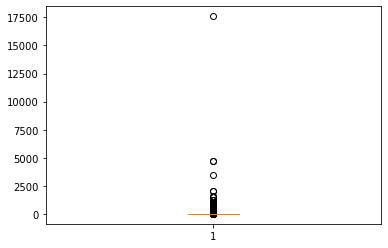

In [24]:
#Create a box plot for the raised_amount_usd column
plt.boxplot(master_frame.loc[~(master_frame.raised_amount_usd.isnull())]['raised_amount_usd'])
plt.show()

 Its look like we can not impute missing column with any value so better to remove them 
 
 

In [25]:
master_frame = master_frame.loc[~(master_frame.raised_amount_usd.isnull() | master_frame.category_list.isnull() | master_frame.country_code.isnull() )]
master_frame.shape

(75124, 6)

In [26]:
master_frame_funding_Type = master_frame
master_frame_funding_Type.shape

(75124, 6)

In [27]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink     0.0
funding_round_type    0.0
raised_amount_usd     0.0
permalink             0.0
category_list         0.0
country_code          0.0
dtype: float64

In [28]:
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

#Most representetive value -- it measn Mean()

1. Representative funding amount of venture type
2. Representative funding amount of angel type
3. Representative funding amount of seed type
4. Representative funding amount of private equity type
5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?


funding_round_type
angel              0.97
private_equity    73.94
seed               0.74
venture           11.72
Name: raised_amount_usd, dtype: float64

In [29]:

master_frame.groupby(master_frame['funding_round_type'])['raised_amount_usd'].mean().round(2)

funding_round_type
angel              0.97
private_equity    73.94
seed               0.74
venture           11.72
Name: raised_amount_usd, dtype: float64

## Checkpoint 3: Country Analysis

---
1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

 

Identify the top three English-speaking countries in the data frame top9.

In [30]:
#filter data for venture type only

master_frame_venture = master_frame.loc[(master_frame.funding_round_type == 'venture')]
master_frame_venture.shape

(47809, 6)

In [31]:
top9 = pd.pivot_table(data=master_frame_venture,index="country_code", values="raised_amount_usd", aggfunc=sum)
top9 = top9.sort_values(by='raised_amount_usd', ascending=False)
top9 = top9.iloc[:9,:].round(1)
top9
#in mn

# master_frame_venture.loc[(master_frame_venture.country_code=='JPN')]['raised_amount_usd'].sum()/1000000

,raised_amount_usd
country_code,
USA,420049.6
CHN,39337.7
GBR,20074.2
IND,14261.4
CAN,9481.6
FRA,7227.3
ISR,6854.2
DEU,6307.6
JPN,3167.4


In [32]:
top9.raised_amount_usd = top9.raised_amount_usd.astype("int64")
top9


,raised_amount_usd
country_code,
USA,420049
CHN,39337
GBR,20074
IND,14261
CAN,9481
FRA,7227
ISR,6854
DEU,6307
JPN,3167


In [33]:
# English speaking countries. China we can removed from top 3

master_frame_venture_en_top3 = master_frame_venture.loc[(master_frame_venture.country_code=='USA')
                                                        |(master_frame_venture.country_code=='IND')
                                                        |(master_frame_venture.country_code=='GBR')]

In [34]:
master_frame = master_frame_venture_en_top3
master_frame.shape

(38803, 6)

## Checkpoint 4: Sector Analysis 1

---

1. Extract the primary sector of each category list from the category_list column

2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

Expected Results: Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

[NOTE] : category_list has multiple values divided by |. so we need to manipulate it to the 1st value of the str array.

[NOTE] : Mapping data set is in  wide format so we need to Changing to long format with help of (pd.melt)

In [35]:
master_frame['category_list'] = master_frame['category_list'].str.split('|').str[0].str.lower()
master_frame.shape
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   38803 non-null  object 
 1   funding_round_type  38803 non-null  object 
 2   raised_amount_usd   38803 non-null  float64
 3   permalink           38803 non-null  object 
 4   category_list       38803 non-null  object 
 5   country_code        38803 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
import chardet
with open("../input/spark-fund-investment-analysis/datasets/mapping.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [37]:
mapping = pd.read_csv('../input/spark-fund-investment-analysis/datasets/mapping.csv',encoding= 'ascii', engine = 'python')
#mapping['main_category'] = mapping.dot(mapping.columns+',').str[:-1]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [38]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [39]:
mapping.category_list

0                   NaN
1                    3D
2           3D Printing
3         3D Technology
4            Accounting
             ...       
683           Wholesale
684    Wine And Spirits
685            Wireless
686               Women
687        Young Adults
Name: category_list, Length: 688, dtype: object

#### Changing from wide format to long format pd.melt()

#### Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
        
[NOTE] : Same u can achieve by dot function as well

df1 = mapping.iloc[:,1:].dot(mapping.iloc[:,1:].columns)

mapping['main_category'] = df1

mapping = mapping.loc[:,['category_list','main_category']]



In [40]:
wide_df = pd.DataFrame(mapping)
wide_df

# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = list(wide_df.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(wide_df.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [41]:
# convert into long
long_df = pd.melt(wide_df, 
        id_vars = id_vars, 
        value_vars = value_vars)
long_df

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [42]:
# remove rows having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)
long_df

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [43]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'main_sector'})
long_df

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [44]:
mapping = long_df
mapping.category_list = mapping.category_list.str.lower()
mapping


,category_list,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports
...,...,...
6121,social recruiting,"Social, Finance, Analytics, Advertising"
6122,social television,"Social, Finance, Analytics, Advertising"
6123,social travel,"Social, Finance, Analytics, Advertising"
6134,stock exchanges,"Social, Finance, Analytics, Advertising"


In [45]:
mapping.loc[(mapping.category_list == 'enterprise 2.na')]

,category_list,main_sector


#### As part of Data cleaning on Mapping Dataset

[NOTE]: when you analyze the mapping dataset  you will found some weird data it seems some issue in the data. like Analytics was A0lytics. 

when i did merge and check for null i found below result. how analytics come as NaN. then i checked my mapping file and found that Analytics was A0lytics

same thing was happening for some other category like Finance = Fi0nce means 0 = na 

Analytics                          1334
Finance                             561
Nanotechnology                      141
Financial Services                  105

#then 141 records for Nanotechnology got failed we have to lower the case for category_list

enterprise 2.0                     4
adaptive equipment                 2
retirement                         2
racing                             1

code to check after merging -- master_frame.loc[(master_frame.main_category.isnull())]['category_list'].value_counts()



In [46]:
# Replacing 0 with na i.e A0lytics to Analytics
mapping.category_list = mapping.category_list.str.replace('0','na')
mapping.category_list = mapping.category_list.str.replace('2.na','2.0')

# Lower case for master_frame['category_list'] so that no merging issue 
master_frame['category_list']=master_frame['category_list'].str.lower()
master_frame = master_frame.merge(mapping, on='category_list', how='left')
master_frame.shape


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(38803, 7)

In [47]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 38802
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_permalink   38803 non-null  object 
 1   funding_round_type  38803 non-null  object 
 2   raised_amount_usd   38803 non-null  float64
 3   permalink           38803 non-null  object 
 4   category_list       38803 non-null  object 
 5   country_code        38803 non-null  object 
 6   main_sector         38792 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [48]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,/organization/-fame,media,IND,Entertainment
1,/organization/0xdata,venture,20.0,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,/organization/1-mainstream,apps,USA,"News, Search and Messaging"


In [49]:
master_frame.loc[(master_frame.main_sector.isnull())]['category_list'].value_counts()


retirement                         2
adaptive equipment                 2
rapidly expanding                  1
natural gas uses                   1
specialty retail                   1
biotechnology and semiconductor    1
racing                             1
product search                     1
greentech                          1
Name: category_list, dtype: int64

In [50]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,/organization/-fame,media,IND,Entertainment
1,/organization/0xdata,venture,20.0,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,venture,1.7,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/0xdata,venture,8.9,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,/organization/1-mainstream,apps,USA,"News, Search and Messaging"


In [51]:
# the range of funding preferred by Spark Funds is 5 to 15 million USD
master_frame = master_frame.loc[(master_frame.raised_amount_usd<=15)&(master_frame.raised_amount_usd>=5)]
master_frame.shape

(13076, 7)

In [52]:
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
permalink             0
category_list         0
country_code          0
main_sector           1
dtype: int64

In [53]:
## Removing null value

master_frame = master_frame.loc[~(master_frame.main_sector.isnull())]
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
permalink             0
category_list         0
country_code          0
main_sector           0
dtype: int64

 ## Checkpoint 5: Sector Analysis 2
 
 ---
 
<li> Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. 
    <li> The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 
        <li> Using the three data frames, you can calculate the total number of investments and the total amount of investments in each main sector for each of the three countries.

In [54]:
d1 = master_frame.loc[(master_frame.country_code=='USA')]
d2 = master_frame.loc[(master_frame.country_code=='GBR')]
d3 = master_frame.loc[(master_frame.country_code=='IND')]
d1.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,main_sector
3,/organization/0xdata,venture,8.9,/organization/0xdata,analytics,USA,"Social, Finance, Analytics, Advertising"
4,/organization/1-mainstream,venture,5.0,/organization/1-mainstream,apps,USA,"News, Search and Messaging"
17,/organization/128-technology,venture,12.0,/organization/128-technology,service providers,USA,Others
20,/organization/1366-technologies,venture,15.0,/organization/1366-technologies,manufacturing,USA,Manufacturing
21,/organization/1366-technologies,venture,5.0,/organization/1366-technologies,manufacturing,USA,Manufacturing


In [55]:
d2.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,main_sector
108,/organization/365scores,venture,5.5,/organization/365scores,android,GBR,"Social, Finance, Analytics, Advertising"
232,/organization/7digital,venture,8.5,/organization/7digital,content creators,GBR,Entertainment
233,/organization/7digital,venture,10.0,/organization/7digital,content creators,GBR,Entertainment
256,/organization/90min,venture,15.0,/organization/90min,media,GBR,Entertainment
257,/organization/90min,venture,5.8,/organization/90min,media,GBR,Entertainment


In [56]:
d3.head()

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,main_sector
0,/organization/-fame,venture,10.0,/organization/-fame,media,IND,Entertainment
55,/organization/21diamonds-india,venture,6.4,/organization/21diamonds-india,e-commerce,IND,Others
276,/organization/a-little-world,venture,6.4,/organization/a-little-world,finance,IND,"Social, Finance, Analytics, Advertising"
926,/organization/adlabs-imagica,venture,8.2,/organization/adlabs-imagica,entertainment,IND,Entertainment
1262,/organization/agile,venture,5.7,/organization/agile,finance,IND,"Social, Finance, Analytics, Advertising"


1. Total number of investments (count)

2. Total amount of investment (USD)

3. Top sector (based on count of investments)

4. Second-best sector (based on count of investments)

5. Third-best sector (based on count of investments)

6. Number of investments in the top sector (refer to point 3)

7. Number of investments in the second-best sector (refer to point 4)

8. Number of investments in the third-best sector (refer to point 5)

9. For the top sector count-wise (point 3), which company received the highest investment?

10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [57]:
res_d1 = d1.groupby(d1['main_sector'])
res_d1
#d1 = d1.merge(res_d1,how='left', on='main_sector')
#d1

In [58]:
#Total number of investments (count)

print(d1.main_sector.value_counts().sum())
print(d2.main_sector.value_counts().sum())
print(d3.main_sector.value_counts().sum())

12122
624
329


In [59]:
#d1['main_sector_raised_amount_usd'] = d1.groupby(d1['main_sector'])['raised_amount_usd'].sum()
res_d1 = d1.groupby(d1['main_sector'])['raised_amount_usd'].sum()

In [60]:
res_d3 = d3.groupby(d3['main_sector'])['raised_amount_usd'].sum()

In [61]:
res_d2 = d2.groupby(d2['main_sector'])['raised_amount_usd'].sum()

In [62]:
#Total amount of investment (USD)

print(res_d1.sum().round(2))
print(res_d2.sum().round(2))
print(res_d3.sum().round(2))

108249.0
5404.1
2954.7


In [63]:
# Top sector (based on count of investments)

d1_pivot = pd.pivot_table(data=d1,values="raised_amount_usd",index="main_sector", aggfunc=[sum,'count'])
d1_pivot
#Others	26405.6	2961
#Social, Finance, Analytics, Advertising	23881.4	2723
# Cleantech / Semiconductors	21753.6	2364

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,1469.3,168
Cleantech / Semiconductors,21753.6,2364
Entertainment,5119.0,593
Health,8301.1,919
Manufacturing,7322.4,806
"News, Search and Messaging",13996.6,1588
Others,26405.6,2961
"Social, Finance, Analytics, Advertising",23881.4,2723


In [64]:
# Top second sector (based on count of investments)

d2_pivot = pd.pivot_table(data=d2,values="raised_amount_usd",index="main_sector", aggfunc=[sum,'count'])
d2_pivot
# Others	1303.9	149
# Social, Finance, Analytics, Advertising	1089.3	133
# Cleantech / Semiconductors	1169.1	131

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,167.0,16
Cleantech / Semiconductors,1169.1,131
Entertainment,482.9,56
Health,214.4,24
Manufacturing,361.9,42
"News, Search and Messaging",615.6,73
Others,1303.9,149
"Social, Finance, Analytics, Advertising",1089.3,133


In [65]:
# Top third (based on count of investments)

d3_pivot = pd.pivot_table(data=d3,values="raised_amount_usd",index="main_sector", aggfunc=[sum,'count'])
d3_pivot
# Others	1013.4	110
# Social, Finance, Analytics, Advertising	550.5	60
# News, Search and Messaging	438.9	53

,sum,count
,raised_amount_usd,raised_amount_usd
main_sector,,
Automotive & Sports,136.9,13
Cleantech / Semiconductors,165.3,20
Entertainment,280.9,33
Health,167.8,19
Manufacturing,201.0,21
"News, Search and Messaging",438.9,53
Others,1013.4,110
"Social, Finance, Analytics, Advertising",550.5,60


In [66]:
# For the top sector count-wise (point 3), which company received the highest investment?

d1_comp_top1 = d1.loc[(d1.main_sector == 'Others')]

d1_comp_top1_pivot = pd.pivot_table(data=d1_comp_top1,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d1_comp_top1_pivot = d1_comp_top1_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d1_comp_top1_pivot.head(1))

# For the second top sector count-wise (point 3), which company received the highest investment?
d1_comp_top2 = d1.loc[(d1.main_sector == 'Social, Finance, Analytics, Advertising')]

d1_comp_top2_pivot = pd.pivot_table(data=d1_comp_top2,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d1_comp_top2_pivot = d1_comp_top2_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d1_comp_top2_pivot.head(1))


                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.4
                           raised_amount_usd
company_permalink                           
/organization/shotspotter               68.0


In [67]:
d2_comp_top1 = d2.loc[(d2.main_sector == 'Others')]

d2_comp_top1_pivot = pd.pivot_table(data=d2_comp_top1,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d2_comp_top1_pivot = d2_comp_top1_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d2_comp_top1_pivot.head(1))

# For the second top sector count-wise (point 3), which company received the highest investment?
d2_comp_top2 = d2.loc[(d2.main_sector == 'Social, Finance, Analytics, Advertising')]

d2_comp_top2_pivot = pd.pivot_table(data=d2_comp_top2,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d2_comp_top2_pivot = d2_comp_top2_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d2_comp_top2_pivot.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0
                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


In [68]:
d3_comp_top1 = d3.loc[(d3.main_sector == 'Others')]

d3_comp_top1_pivot = pd.pivot_table(data=d3_comp_top1,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d3_comp_top1_pivot = d3_comp_top1_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d3_comp_top1_pivot.head(1))

# For the second top sector count-wise (point 3), which company received the highest investment?
d3_comp_top2 = d3.loc[(d3.main_sector == 'Social, Finance, Analytics, Advertising')]

d3_comp_top2_pivot = pd.pivot_table(data=d3_comp_top2,values="raised_amount_usd",index="company_permalink", aggfunc=sum)

d3_comp_top2_pivot = d3_comp_top2_pivot.sort_values(by='raised_amount_usd', ascending= False)
print(d3_comp_top2_pivot.head(1))

                            raised_amount_usd
company_permalink                            
/organization/firstcry-com               39.0
                               raised_amount_usd
company_permalink                               
/organization/manthan-systems               50.7


## Checkpoint 6: Plots

---

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

 

1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.                                                                                                                                                                             

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [69]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [70]:

plot_bar_ft = master_frame_funding_Type.groupby(master_frame_funding_Type['funding_round_type'])['raised_amount_usd'].mean().round(2)
plot_bar_ft
##Plot a bar plot of Content Rating vs Average Rating 
#master_frame_funding_Type.groupby(['funding_round_type'])['raised_amount_usd'].mean().plot.barh()
#plt.show()

# adding Mn to the value
plot_bar_ft_val = plot_bar_ft.apply(lambda x : str(x) + ' Mn')
plot_bar_ft_val


funding_round_type
angel              0.97 Mn
private_equity    73.94 Mn
seed               0.74 Mn
venture           11.72 Mn
Name: raised_amount_usd, dtype: object

In [71]:
import plotly           #(version 4.5.4) #pip install plotly==4.5.4
import plotly.express as px
import plotly.io as pio



barchart = px.bar(
    data_frame=plot_bar_ft,
    x=plot_bar_ft.index,
    y=plot_bar_ft.values,
    color = plot_bar_ft.index,
    color_discrete_map={
                "angel": "skyblue",
                "seed": "skyblue",
                "venture": "orange",
                "private_equity": "skyblue"}, # differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"funding_round_type":"Funding Type",
    "y":"Avg Investment in Million USD"}, 
    title='Funding Type Analysis (Avg Investment Funding)',
    text=plot_bar_ft_val.values,
    template='presentation',
)
barchart.update_layout(uniformtext_minsize=5, uniformtext_mode='show'),
barchart.update_traces(textposition='auto'),
pio.show(barchart)

In [72]:
top9_cntry_ft = master_frame_venture.groupby(
    master_frame_venture['country_code'])['raised_amount_usd'].sum().apply(lambda t: t/1000).round(2)
top9_cntry_ft = top9_cntry_ft.sort_values(ascending=False)
top9_cntry_ft = top9_cntry_ft[:9]
type(top9_cntry_ft)

top9_cntry_ft_val = top9_cntry_ft.apply(lambda x : str(x) + ' Bn')
top9_cntry_ft
top9_cntry_ft_val

country_code
USA    420.05 Bn
CHN     39.34 Bn
GBR     20.07 Bn
IND     14.26 Bn
CAN      9.48 Bn
FRA      7.23 Bn
ISR      6.85 Bn
DEU      6.31 Bn
JPN      3.17 Bn
Name: raised_amount_usd, dtype: object

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [73]:
# top9.plot.bar()
# plt.show()

skyblue = 'Country'
color = ['skyblue' for i in range(9)]

barchart = px.bar(
    data_frame=top9_cntry_ft,
    x=top9_cntry_ft.index,
    y=top9_cntry_ft.values,
    color = top9_cntry_ft.index,
    color_discrete_map={
                "USA": "orange",
                "GBR": "orange",
                "IND": "orange",
                "CHN": "red",
                "ISR": "skyblue",
                "DEU": "skyblue",
                "JPN": "skyblue",
                "FRA": "skyblue",
                "CAN": "skyblue"},
    # differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"country_code":"Countries",
    "y":"Total Investment in Billion USD"}, 
    title='Total Venture FT Investment(Billion USD) by Country',
    text=top9_cntry_ft_val.values,
    template='presentation',
)
barchart.update_layout(uniformtext_minsize=5, uniformtext_mode='show'),
barchart.update_traces(textposition='outside'),
pio.show(barchart)

####  A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [74]:
# d1_pivot['count'].plot.bar()
# plt.show()
# d2_pivot['count'].plot.bar()
# plt.show()
# d3_pivot['count'].plot.bar()
# plt.show()



In [75]:
d1_USA_Venture_Main_Sector = d1.groupby(d1['main_sector'])['funding_round_type'].count()
d1_USA_Venture_Main_Sector = d1_USA_Venture_Main_Sector.sort_values(ascending=False)
d1_USA_Venture_Main_Sector

main_sector
Others                                     2961
Social, Finance, Analytics, Advertising    2723
Cleantech / Semiconductors                 2364
News, Search and Messaging                 1588
Health                                      919
Manufacturing                               806
Entertainment                               593
Automotive & Sports                         168
Name: funding_round_type, dtype: int64

In [76]:
# Best Sector - USA (By Count of Investment
barchart = px.bar(
    data_frame=d1_USA_Venture_Main_Sector,
    x=d1_USA_Venture_Main_Sector.index,
    y=d1_USA_Venture_Main_Sector.values,
    color=d1_USA_Venture_Main_Sector.index,
    color_discrete_map={
                "Social, Finance, Analytics, Advertising": "green",
                "News, Search and Messaging": "skyblue",
                "Others": "skyblue",
                "Entertainment": "skyblue",
                "Manufacturing": "skyblue",
                "Health": "skyblue",
                "Cleantech / Semiconductors": "green",
                "Automotive & Sports": "skyblue"},
    # differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"main_sector":"Main Sectors",
    "y":"Total Count of Investment"}, 
    title='Best Sector By Count of Investment - USA',
    text=d1_USA_Venture_Main_Sector.values,
    template='plotly',
)   
pio.show(barchart)


In [77]:
d2_GBR_Venture_Main_Sector = d2.groupby(
    d2['main_sector'])['funding_round_type'].count()
d2_GBR_Venture_Main_Sector = d2_GBR_Venture_Main_Sector.sort_values(ascending=False)
d2_GBR_Venture_Main_Sector

main_sector
Others                                     149
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 131
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: funding_round_type, dtype: int64

In [78]:
barchart = px.bar(
    data_frame=d2_GBR_Venture_Main_Sector,
    x=d2_GBR_Venture_Main_Sector.index,
    y=d2_GBR_Venture_Main_Sector.values,
    color=d2_GBR_Venture_Main_Sector.index,
    color_discrete_map={
                "Social, Finance, Analytics, Advertising": "green",
                "News, Search and Messaging": "skyblue",
                "Others": "skyblue",
                "Entertainment": "skyblue",
                "Manufacturing": "skyblue",
                "Health": "skyblue",
                "Cleantech / Semiconductors": "green",
                "Automotive & Sports": "skyblue"},# differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"main_sector":"Main Sectors",
    "y":"Total Count of Investment"}, 
    title='Best Sector By Count of Investment - GBR',
    text=d2_GBR_Venture_Main_Sector.values,
   # width=600,                   # figure width in pixels
    #height=420, 
    template='plotly',
)   
pio.show(barchart)

In [79]:
d3_IND_Venture_Main_Sector = d3.groupby(
    d3['main_sector'])['funding_round_type'].count()
d3_IND_Venture_Main_Sector = d3_IND_Venture_Main_Sector.sort_values(ascending=False)
d3_IND_Venture_Main_Sector

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  53
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: funding_round_type, dtype: int64

In [80]:
barchart = px.bar(
    data_frame=d3_IND_Venture_Main_Sector,
    x=d3_IND_Venture_Main_Sector.index,
    y=d3_IND_Venture_Main_Sector.values,
    color=d3_IND_Venture_Main_Sector.index,
    color_discrete_map={
                "Social, Finance, Analytics, Advertising": "green",
                "News, Search and Messaging": "green",
                "Others": "skyblue",
                "Entertainment": "skyblue",
                "Manufacturing": "skyblue",
                "Health": "skyblue",
                "Cleantech / Semiconductors": "skyblue",
                "Automotive & Sports": "skyblue"},# differentiate color of marks
    #opacity=0.9,                  # set opacity of markers (from 0 to 1)
    orientation="v",              # 'v','h': orientation of the marks
    labels={"main_sector":"Main Sectors",
    "y":"Total Count of Investment"}, 
    title='Best Sector By Count of Investment - IND',
    text=d3_IND_Venture_Main_Sector.values,
    template='plotly',
)   
pio.show(barchart)

## Conclusion

---

Lets extract some information from the dataset which will help in the PPT

In [81]:
# Calculate Year range for which we are analyzing dataset. it will tell us the given data set has teh range of this year to analyze

date = companies['founded_at'].loc[~(companies['founded_at'].isnull())].values
year = list(map(lambda x: int(str(x).split('-')[-1]), date))

year = list(map(lambda x: x if 1800 < x < 2020 else 2000, year))
year
print(min(year))
print(max(year))



1901
2016


In [82]:
# to check how many discrete Countries to Analyze

companies['country_code'].unique().size

138